In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)


Using TensorFlow backend.


Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7117 - acc: 0.4860
Epoch 2/10
1000/1000 [==============================] - 0s 60us/step - loss: 0.6964 - acc: 0.5240
Epoch 3/10
1000/1000 [==============================] - 0s 49us/step - loss: 0.6930 - acc: 0.5360
Epoch 4/10
1000/1000 [==============================] - 0s 45us/step - loss: 0.6884 - acc: 0.5460
Epoch 5/10
1000/1000 [==============================] - 0s 47us/step - loss: 0.6855 - acc: 0.5520
Epoch 6/10
1000/1000 [==============================] - 0s 41us/step - loss: 0.6826 - acc: 0.5640
Epoch 7/10
1000/1000 [==============================] - 0s 41us/step - loss: 0.6797 - acc: 0.5670
Epoch 8/10
1000/1000 [==============================] - 0s 43us/step - loss: 0.6770 - acc: 0.5700
Epoch 9/10
1000/1000 [==============================] - 0s 46us/step - loss: 0.6745 - acc: 0.5790
Epoch 10/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.6706 - acc: 0.5960


In [2]:
# For a single-input model with 10 classes (categorical classification):

import keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)


Epoch 1/10
1000/1000 [==============================] - 0s 310us/step - loss: 2.3760 - acc: 0.1050
Epoch 2/10
1000/1000 [==============================] - 0s 42us/step - loss: 2.3264 - acc: 0.1060
Epoch 3/10
1000/1000 [==============================] - 0s 43us/step - loss: 2.3106 - acc: 0.1080
Epoch 4/10
1000/1000 [==============================] - 0s 43us/step - loss: 2.3017 - acc: 0.1250
Epoch 5/10
1000/1000 [==============================] - 0s 43us/step - loss: 2.2940 - acc: 0.1220
Epoch 6/10
1000/1000 [==============================] - 0s 43us/step - loss: 2.2828 - acc: 0.1260
Epoch 7/10
1000/1000 [==============================] - 0s 49us/step - loss: 2.2715 - acc: 0.1500
Epoch 8/10
1000/1000 [==============================] - 0s 51us/step - loss: 2.2648 - acc: 0.1610
Epoch 9/10
1000/1000 [==============================] - 0s 59us/step - loss: 2.2525 - acc: 0.1420
Epoch 10/10
1000/1000 [==============================] - 0s 89us/step - loss: 2.2452 - acc: 0.1610


#MNIST DIGITS DATASETS

In [3]:
import numpy as np
np.random.seed(123)

In [4]:
from keras.models import Sequential

In [37]:
from keras.layers import Dense, Dropout, Activation,Flatten

In [6]:
from keras.layers import Convolution2D, MaxPooling2D

In [7]:
from keras.utils import np_utils

In [8]:
from keras.datasets import mnist

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 158s 14us/step


In [12]:
print (X_train.shape)

(60000, 28, 28)


In [14]:
import matplotlib.pyplot as plt

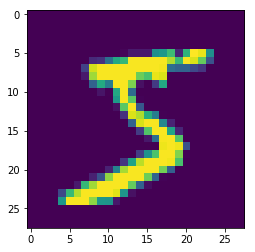

In [15]:
plt.imshow(X_train[0])

In [16]:
#PREPROCESS

In [17]:
X_train = X_train.reshape(X_train.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [19]:
print (X_train.shape)

(60000, 1, 28, 28)


In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
print (y_train.shape)

(60000,)


In [22]:
print (y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [23]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

In [24]:
print (Y_train.shape)

(60000, 10)


In [25]:
#MODEL ARCHITECTURE

In [44]:
model = Sequential()

In [46]:
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28), dim_ordering='th'))


C:\Users\HP\Documents\ullu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(1, 28, 28..., data_format="channels_first")`
  """Entry point for launching an IPython kernel.


In [47]:
print (model.output_shape)

(None, 32, 26, 26)


In [50]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


C:\Users\HP\Documents\ullu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [51]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [53]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

C:\Users\HP\Documents\ullu\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.3021 - acc: 0.9060
Epoch 2/10
60000/60000 [==============================] - 300s 5ms/step - loss: 0.1044 - acc: 0.9688
Epoch 3/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0852 - acc: 0.9747
Epoch 4/10
60000/60000 [==============================] - 277s 5ms/step - loss: 0.0706 - acc: 0.9788
Epoch 5/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.0647 - acc: 0.9814
Epoch 6/10
60000/60000 [==============================] - 328s 5ms/step - loss: 0.0591 - acc: 0.9831
Epoch 7/10
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0509 - acc: 0.9848
Epoch 8/10
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0510 - acc: 0.9843
Epoch 9/10
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0473 - acc: 0.9853
Epoch 10/10
60000/60000 [==============================] - 301s 5ms/step - loss: 0.0454 - a

In [54]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [55]:
score

[0.029438361852151138, 0.99029999999999996]